In [1]:
file_id_train = "17LdtNKkpOEpk-l_EKX4BwtGUm0ML6vmT" #links = 2 (472827)events
file_id_val = "1WC-TS1pel_lUT7bPenVyDXKEQjxjAmlg" #links = 1 (920599)events

#!gdown https://drive.google.com/uc?id={file_id_train}
#!gdown https://drive.google.com/uc?id={file_id_val}
!ls

#!pip install nflows

 figures		       Originale.ipynb	 README.md
'images test reconstruction'   papers		 trasformation.py


In [2]:
#training
# gaus = flow(data)
# unif = erf(gaus)
# unif' = unif * 2**N
# unif'' = int(unif')
# comp = unif''/2**N
# gaus' = erfinv(comp)
# data' = flow^-1(gaus') ==? data

In [35]:
import trasformation

In [33]:
from nflows.flows.base import Flow
from nflows.distributions.normal import StandardNormal
from nflows.transforms.base import CompositeTransform
from nflows.transforms.base import InverseTransform
from nflows.transforms.autoregressive import MaskedAffineAutoregressiveTransform
from nflows.transforms.permutations import ReversePermutation
from nflows.transforms.permutations import RandomPermutation

from torch import optim
from sklearn import preprocessing
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
import torch


labels_map = {
    0: "$p_T$",
    1: "$\eta$",
    2: "$\phi$",
    3: "mass",
    4: "JetArea",
    5: "ChargedHadronEnergy",
    6: "NeutralHadronEnergy",
    7: "PhotonEnergy",
    8: "ElectronEnergy",
    9: "MuonEnergy",
    10: "HFHadronHadronEnergy",
    11: "HFEMEnergy",
    12: "ChargedHadronMultiplicity",
    13: "NeutralHadronMultiplicity",
    14: "PhotonMultiplicity",
    15: "ElectronMultiplicity",
    16: "MuonMultiplicity",
    17: "HFHadronMultiplicity",
    18: "HFEMMultiplicity",
    19: "ChargedEmEnergy",
    20: "ChargedMuEnergy",
    21: "NeutralEmEnergy",
    22: "ChargedMultiplicity",
    23: "NeutralMultiplicity",
}
num_features = len(labels_map)

index_int = np.append(np.arange(12,19),[22,23])
index_float = np.append(np.arange(0,12),np.arange(19,22))

In [30]:
x = np.loadtxt("/home/unipi/i.ditota/Desktop/dataset_piccolo.txt", delimiter=',')
xval = np.loadtxt("/home/unipi/i.ditota/Desktop/dataset.txt", delimiter=',')
L=len(x)
print(L)

472827


In [36]:
###LOG SU 0 E 3,STD SU TUTTE E QUATTRO LE FEATURES E QUANTILE SU 1,2
x = x[:int(L/8),:] #da mettere al massimo a 8 in colab
xval = xval[:len(x),:]

num_features = 4
x = x[:,0:num_features]
xval = xval[:,0:num_features]

print('Eventi =',len(x))
print('attribute\tvalue\ttype\n')
for i in range(0,num_features,1):
  print('{0}\t{1}\t{2}\n'.format(labels_map[i],x[100,i],type(x[100,i])))

xtr = np.copy(x)
xtrval = np.copy(xval)


xtr = trasformation.prep(original=x, input=xtr, dir='forward', index_log=[0,3], index_quantile=[1,2], n_quantiles=10000)
xtrval = trasformation.prep(original=xval, input=xtrval, dir='forward', index_log=[0,3], index_quantile=[1,2], n_quantiles=10000)

'''
xtr[:,0] = np.log(10 + x[:,0])
xtr[:,3] = np.log(10 + x[:,3])
xtrval[:,0] = np.log(10 + xval[:,0])
xtrval[:,3] = np.log(10 + xval[:,3])

scaler = preprocessing.StandardScaler().fit(xtr)
xtr = scaler.transform(xtr)


scaler_val = preprocessing.StandardScaler().fit(xtrval)
xtrval = scaler_val.transform(xtrval)


quantile = preprocessing.QuantileTransformer(n_quantiles=10000,output_distribution='normal').fit(xtr[:,1:3])
xtr[:,1:3] = quantile.transform(xtr[:,1:3])


quantile_val = preprocessing.QuantileTransformer(n_quantiles=10000,output_distribution='normal').fit(xtrval[:,1:3])
xtrval[:,1:3] = quantile_val.transform(xtrval[:,1:3])
'''
xt = torch.tensor(xtr).to('cuda').float()
xval = torch.tensor(xtrval).to('cuda').float()

Eventi = 59103
attribute	value	type

$p_T$	15.8641204834	<class 'numpy.float64'>

$\eta$	-2.97655129433	<class 'numpy.float64'>

$\phi$	-1.19218158722	<class 'numpy.float64'>

mass	4.52637481689	<class 'numpy.float64'>



AttributeError: module 'trasformation' has no attribute 'prep'

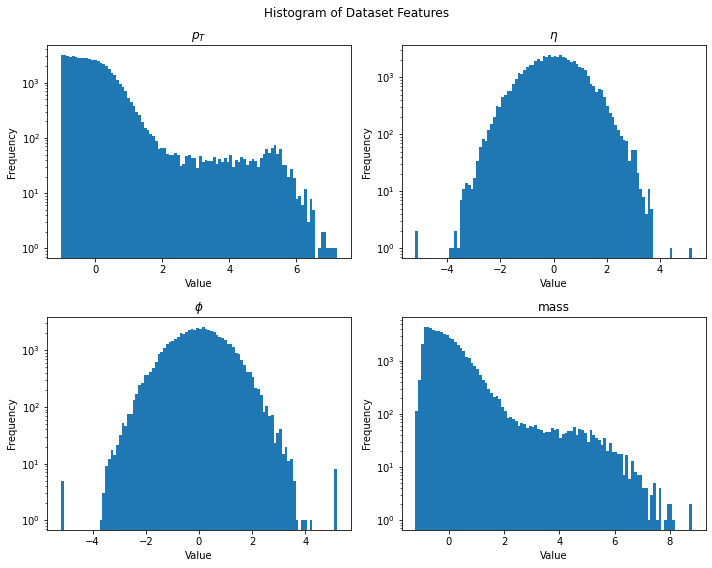

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Histogram of Dataset Features")
n_bins = 100

axs[0, 0].hist(xtr[:, 0], bins=n_bins,log=True)
axs[0, 0].set_title(labels_map[0])
axs[0, 0].set_xlabel("Value")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(xtr[:, 1], bins=n_bins,log=True)
axs[0, 1].set_title(labels_map[1])
axs[0, 1].set_xlabel("Value")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].hist(xtr[:, 2], bins=n_bins,log=True)
axs[1, 0].set_title(labels_map[2])
axs[1, 0].set_xlabel("Value")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(xtr[:, 3], bins=n_bins,log=True)
axs[1, 1].set_title(labels_map[3])
axs[1, 1].set_xlabel("Value")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
fig.savefig('figures/Variables_distribution_transformed.pdf',dpi=190)


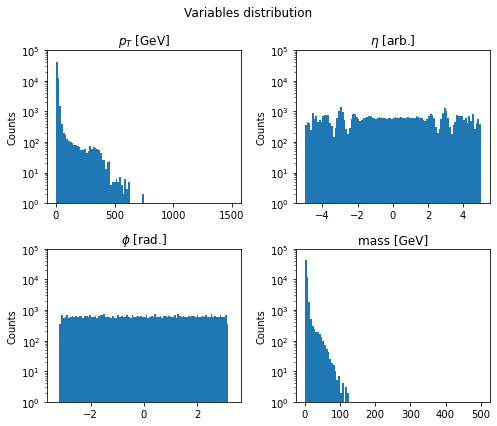

In [7]:
fig,axs = plt.subplots(2, 2,figsize=(7,6))
fig.suptitle("Variables distribution")
n_bins = 100

axs[0, 0].hist(x[:,0],bins=n_bins, range=(0,1500))
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_title('{} [GeV]'.format(labels_map[0]))
axs[0, 0].set_label("Counts")
axs[0, 0].set_ylim(1,10e4)

axs[0, 1].hist(x[:,1],bins=n_bins, range=(-5,5))
axs[0, 1].set_title('{} [arb.]'.format(labels_map[1]))
axs[0, 1].set_ylim(1,10e4)

axs[1, 0].hist(x[:,2],bins=n_bins, range=(-3.30,3.30))
axs[1, 0].set_title('{} [rad.]'.format(labels_map[2]))
axs[1,0].sharey(axs[0,1])

axs[1, 1].hist(x[:,3],bins=n_bins, range=(0,500))
axs[1, 1].set_title('{} [GeV]'.format(labels_map[3]))
axs[1,1].sharey(axs[0,0])

for ax in axs.flat:
    ax.set(ylabel='Counts',yscale='log')

fig.tight_layout()

plt.show()
fig.savefig('figures/Variables_distribution.pdf',dpi=190)

In [8]:
num_iterations = 4 #andrà messo a 8 su colab
num_features=4 #just for testing

base_dist = StandardNormal(shape=[num_features])

transforms = []
for _ in range(num_iterations):
  transforms.append(RandomPermutation(features=num_features))
  #transforms.append(ReversePermutation(features=num_features))
  transforms.append(MaskedAffineAutoregressiveTransform(features=num_features,hidden_features=128))

transform = CompositeTransform(transforms)

flow = Flow(transform, base_dist)
tp = sum(p.numel() for p in flow.parameters() if p.requires_grad)
print(tp)
optimizer = optim.Adam(flow.parameters())

flow = flow.to('cuda')

270880


50 tensor(3.2393, device='cuda:0', grad_fn=<NegBackward0>)
100 tensor(3.0754, device='cuda:0', grad_fn=<NegBackward0>)
150 tensor(2.9455, device='cuda:0', grad_fn=<NegBackward0>)
200 tensor(2.8949, device='cuda:0', grad_fn=<NegBackward0>)
250 tensor(2.8848, device='cuda:0', grad_fn=<NegBackward0>)
300 tensor(2.8516, device='cuda:0', grad_fn=<NegBackward0>)
350 tensor(2.8375, device='cuda:0', grad_fn=<NegBackward0>)
400 tensor(2.8597, device='cuda:0', grad_fn=<NegBackward0>)
450 tensor(2.8313, device='cuda:0', grad_fn=<NegBackward0>)
500 tensor(2.8111, device='cuda:0', grad_fn=<NegBackward0>)
550 tensor(2.8031, device='cuda:0', grad_fn=<NegBackward0>)
600 tensor(2.8089, device='cuda:0', grad_fn=<NegBackward0>)
650 tensor(2.7944, device='cuda:0', grad_fn=<NegBackward0>)
700 tensor(2.7906, device='cuda:0', grad_fn=<NegBackward0>)
750 tensor(2.7873, device='cuda:0', grad_fn=<NegBackward0>)
800 tensor(2.7965, device='cuda:0', grad_fn=<NegBackward0>)
850 tensor(2.8058, device='cuda:0', grad_

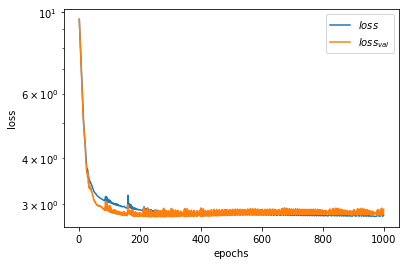

In [9]:
num_iter = 1000 #andrà messo a 10000 su colab

figloss=plt.figure()
loss_values = []
loss_validation = []
for i in range(num_iter):
  optimizer.zero_grad()
  loss = -flow.log_prob(inputs=xt).mean()
  loss_val = -flow.log_prob(inputs=xval).mean()
  loss.backward()
  optimizer.step()
  loss_values.append(loss.cpu().detach().numpy())
  loss_validation.append(loss_val.cpu().detach().numpy())
  if (i+1) % 50 == 0:
    print(i+1,loss)

plt.plot(range(1, num_iter+1), loss_values, label='$loss$')
plt.plot(range(1, num_iter+1), loss_validation,label='$loss_{val}$')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.yscale('log')
plt.legend()
plt.show()
figloss.savefig('figures/Loss_comparison.pdf',dpi=190)

In [10]:
sample = flow.sample(int(len(x)))
sample = sample.cpu().detach().numpy()

sample[:,1:3] = quantile.inverse_transform(sample[:,1:3])
sample = scaler.inverse_transform(sample)
sample[:,0] = np.exp(sample[:,0]) - 10
sample[:,3] = np.exp(sample[:,3]) - 10
#function(data,range_log, range_std, range_quantile,direction)

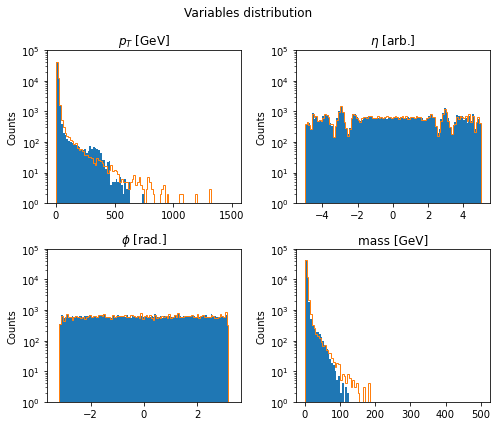

In [11]:
fig,axs = plt.subplots(2, 2,figsize=(7,6))
fig.suptitle("Variables distribution")
n_bins = 100

axs[0, 0].hist(x[:,0],bins=n_bins, range=(0,1500))
axs[0, 0].hist(sample[:,0],bins=n_bins, range=(0,1500),histtype='step')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set_title('{} [GeV]'.format(labels_map[0]))
axs[0, 0].set_label("Counts")
axs[0, 0].set_ylim(1,10e4)

axs[0, 1].hist(x[:,1],bins=n_bins, range=(-5,5))
axs[0, 1].hist(sample[:,1],bins=n_bins, range=(-5,5),histtype='step')
axs[0, 1].set_title('{} [arb.]'.format(labels_map[1]))
axs[0, 1].set_ylim(1,10e4)

axs[1, 0].hist(x[:,2],bins=n_bins, range=(-3.30,3.30))
axs[1, 0].hist(sample[:,2],bins=n_bins, range=(-3.30,3.30),histtype='step')
axs[1, 0].set_title('{} [rad.]'.format(labels_map[2]))
axs[1,0].sharey(axs[0,1])

axs[1, 1].hist(x[:,3],bins=n_bins, range=(0,500))
axs[1, 1].hist(sample[:,3],bins=n_bins, range=(0,500),histtype='step')
axs[1, 1].set_title('{} [GeV]'.format(labels_map[3]))
axs[1,1].sharey(axs[0,0])

for ax in axs.flat:
    ax.set(ylabel='Counts',yscale='log')

fig.tight_layout()

plt.show()
fig.savefig('figures/Variables_distribution_with_reconstruction.pdf',dpi=190)

In [12]:
#training
# gaus = flow(data)
# unif = erf(gaus)
# unif' = unif * 2**N
# unif'' = int(unif')
# comp = unif''/2**N
# gaus' = erfinv(comp)
# data' = flow^-1(gaus') ==? data

In [13]:

###COMPRESSING###
N = 10

x_tensor = torch.tensor(x).to('cuda').float()

inverse_transform = InverseTransform(transforms)
inverseflow = Flow(inverse_transform, distribution=xt)
gaus = inverseflow.sample(int(len(x_tensor)))


plt.figure()
plt.hist(gaus.cpu().detach().numpy(), bins=100, label='Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Uniform Distribution')
plt.legend()
plt.show()
plt.savefig('figures/unif.pdf', dpi=190)


unif = torch.erf(gaus)
unif = unif * 2**N
unif = torch.floor(unif)


comp = unif/2**N   #compression
gaus_comp = torch.erfinv(comp)

x_comp = flow.transform_to_data(gaus_comp)


x_comp = x_comp.cpu().detach().numpy()
x_comp = scaler.inverse_transform(x_comp)
x_comp = np.exp(x_comp) - 10



AttributeError: 'Tensor' object has no attribute 'sample'

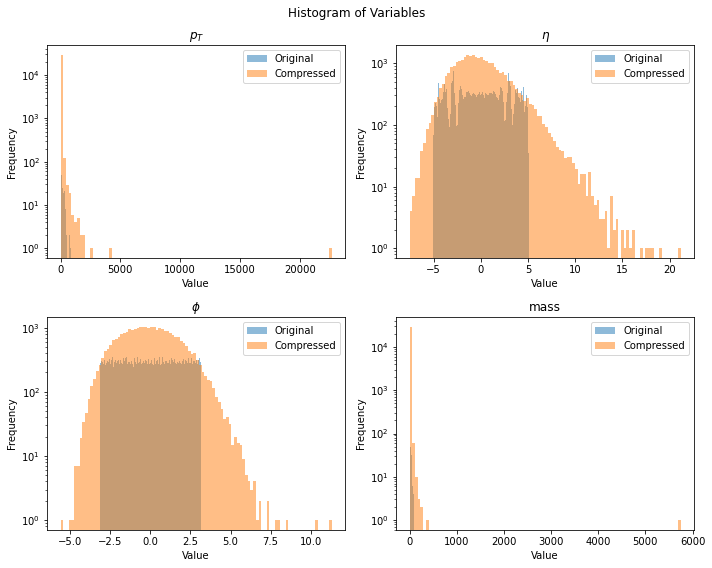

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Histogram of Variables")

n_bins = 100

axs[0, 0].hist(x[:, 0], bins=n_bins, label='Original', alpha=0.5, log=True)
axs[0, 0].hist(x_comp[:, 0], bins=n_bins, label='Compressed', alpha=0.5)
axs[0, 0].set_title(labels_map[0])
axs[0, 0].set_xlabel("Value")
axs[0, 0].set_ylabel("Frequency")
axs[0, 0].legend()

axs[0, 1].hist(x[:, 1], bins=n_bins, label='Original', alpha=0.5, log=True)
axs[0, 1].hist(x_comp[:, 1], bins=n_bins, label='Compressed', alpha=0.5)
axs[0, 1].set_title(labels_map[1])
axs[0, 1].set_xlabel("Value")
axs[0, 1].set_ylabel("Frequency")
axs[0, 1].legend()

axs[1, 0].hist(x[:, 2], bins=n_bins, label='Original', alpha=0.5, log=True)
axs[1, 0].hist(x_comp[:, 2], bins=n_bins, label='Compressed', alpha=0.5)
axs[1, 0].set_title(labels_map[2])
axs[1, 0].set_xlabel("Value")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].legend()

axs[1, 1].hist(x[:, 3], bins=n_bins, label='Original', alpha=0.5, log=True)
axs[1, 1].hist(x_comp[:, 3], bins=n_bins, label='Compressed', alpha=0.5)
axs[1, 1].set_title(labels_map[3])
axs[1, 1].set_xlabel("Value")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].legend()

plt.tight_layout()
plt.show()
fig.savefig('figures/Variables_comparison.pdf', dpi=190)
